# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt> in cell 2 of this notebook?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

#### Answers
1. The Hamiltonian of a system is an operator of the sum of the kinetic energy and potential energy of a system [1]. This operator acts on the state space of a quantum system. The eigenvalues represent the possible energy levels of the system and the eigenvectors are the corresponding stationary states [2].
2. The function *harmonic_oscillator()* defines the elastic potential energy of a system with spring constant _k_. The equation for elastic potential energy comes from integrating Hooke's Law $F=-kx$ with respect to position.
3. The eigenstates are the eigenvalues that result from solving the Hamiltonian and represent the wave functions for the system defined [2].

Sources: \
[1] [Hamiltonian (quantum mechanics) - Wikipedia](https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics))\
[2] [What is Hamiltonian](https://www.quera.com/glossary/hamiltonian)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Computing...
Took 0.007277011871337891
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


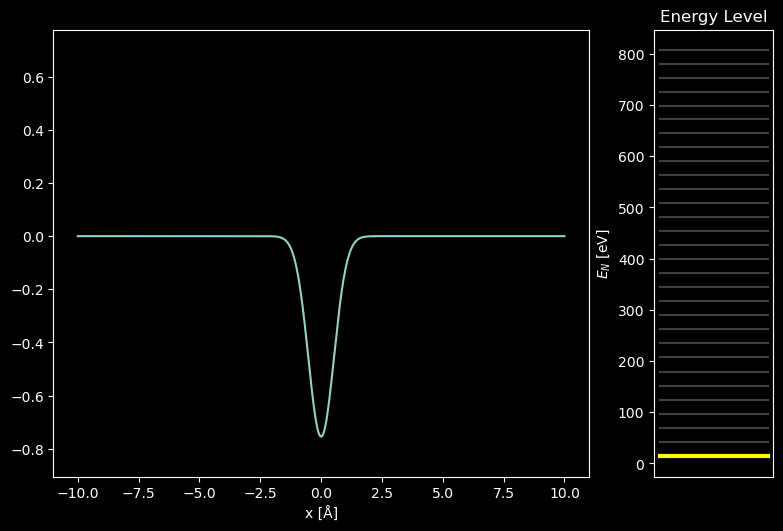

In [9]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)

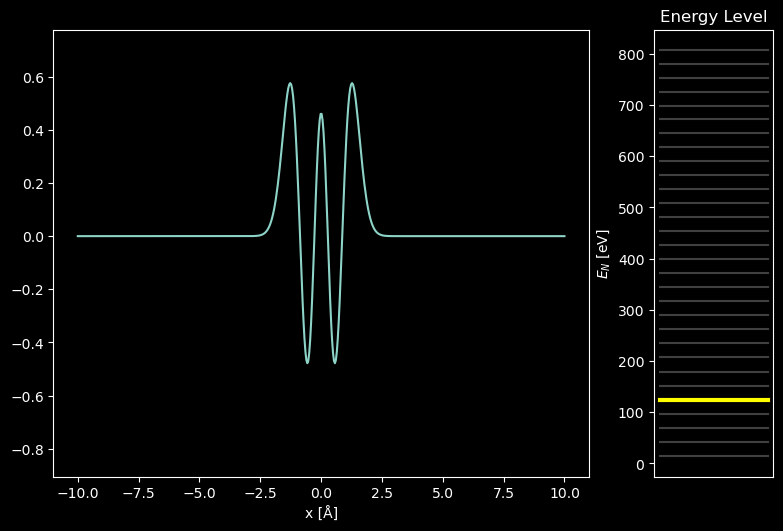

In [16]:
# Visualize MORE Eigenstates
visualization.plot_eigenstate(4)

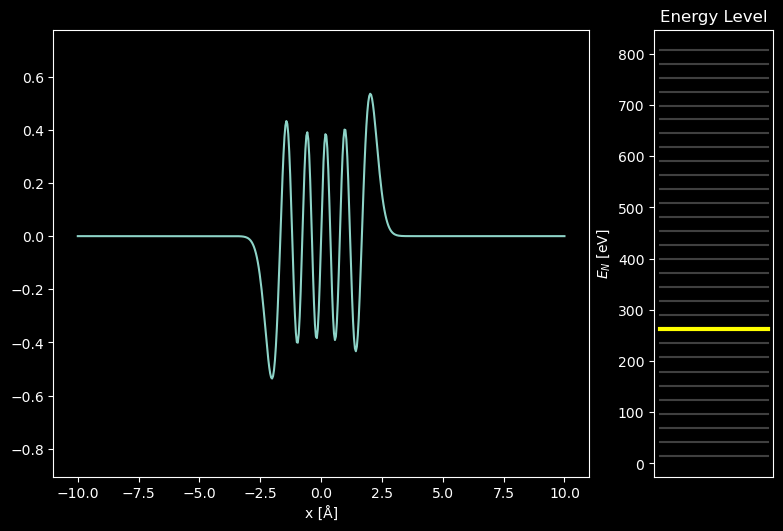

In [11]:
visualization.plot_eigenstate(9)

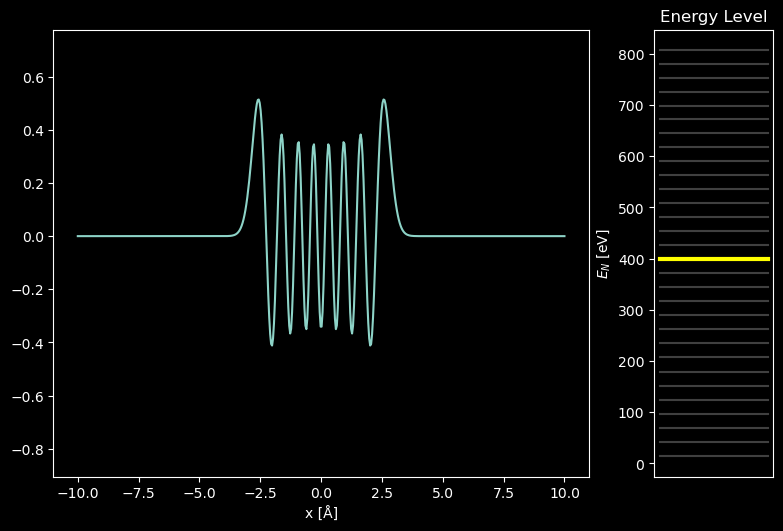

In [12]:
visualization.plot_eigenstate(14)

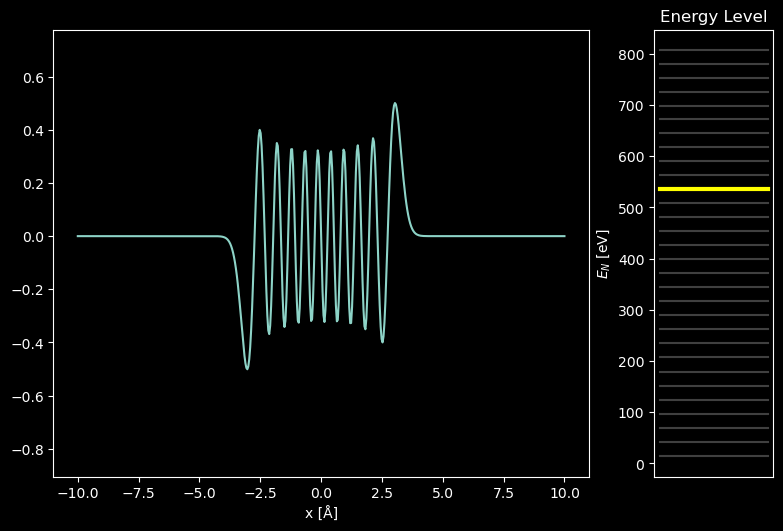

In [13]:
visualization.plot_eigenstate(19)

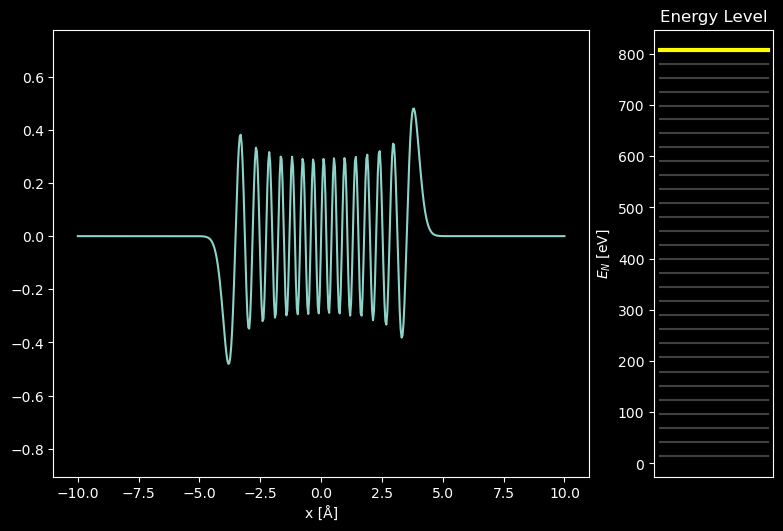

In [14]:
visualization.plot_eigenstate(29)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>

#### Answers
5. The axis of these plots is the spatial domain in which the system exists as shown by the unit of the axis Å which is a unit of length.
6. The plots are showing wave functions and not probability functions because the system oscillates about zero, reaching positive and negative values. If it were a probability function the system can only oscillate between 0 and 1.

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

Computing...
Took 0.004005908966064453
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


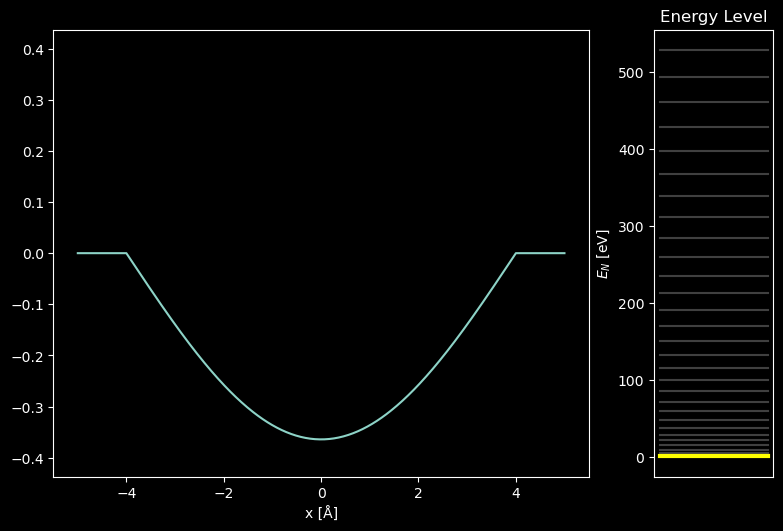

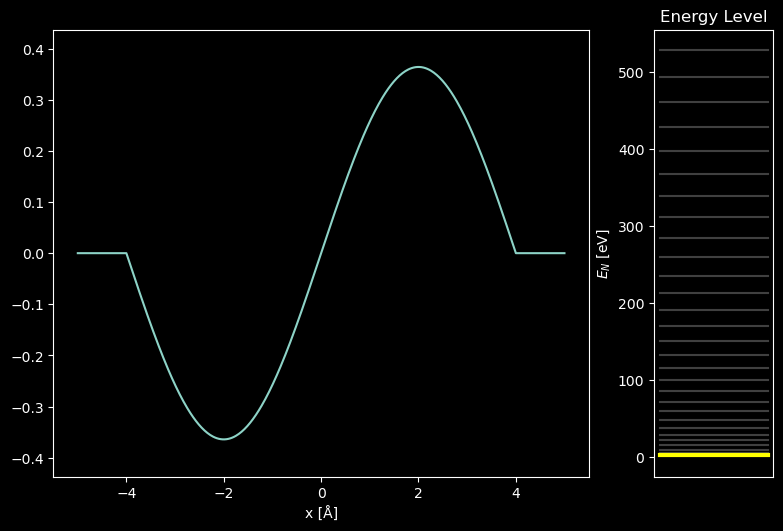

In [83]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

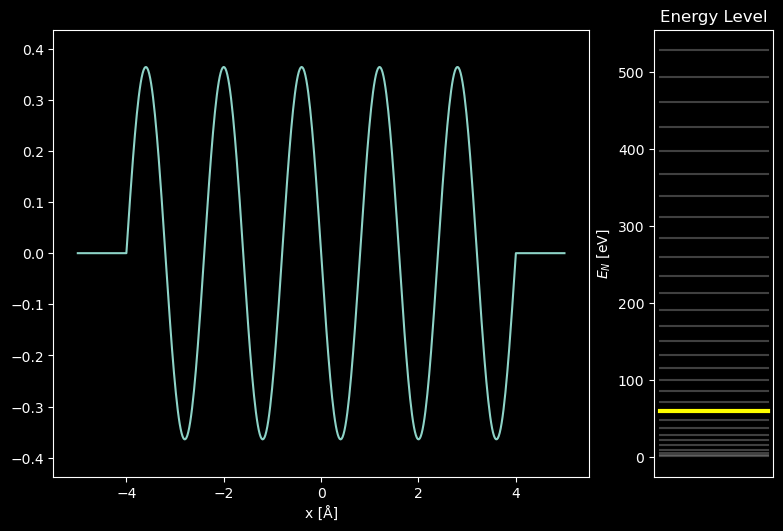

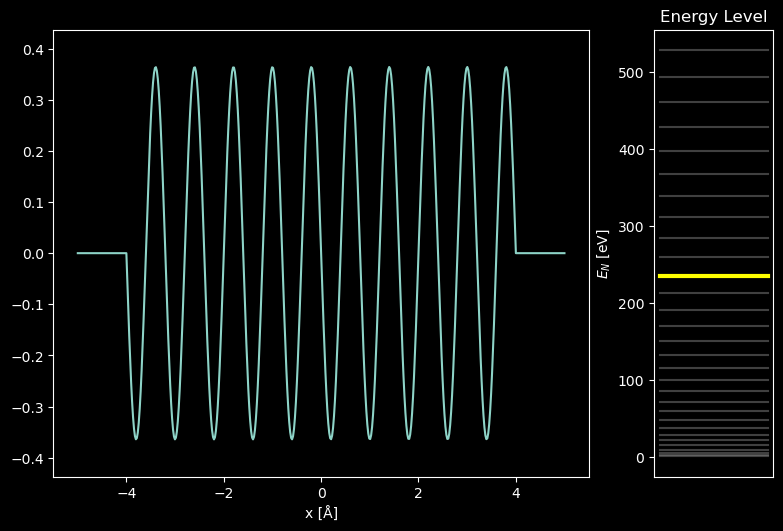

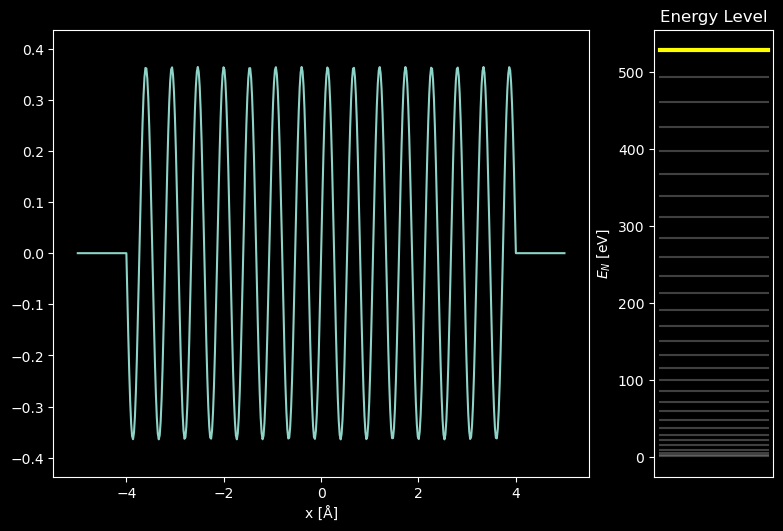

In [17]:
visualization_sw.plot_eigenstate(9)
visualization_sw.plot_eigenstate(19)
visualization_sw.plot_eigenstate(29)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

#### Answers
8. The oscillations for the infinite square well are strictly within the "well" and no matter the eigenstate, they span the whole "well". For the SHO eigenstates, the oscillations do not have a strict domain. Another property of the infinite square well eigenstates that's different than the SHO eigenstates is that the wave function is exactly zero at the boundary, so the function is not smooth like the SHO eigenstates.
9. The number of extrema is equal to the quantum number of the eigenstate. For the plots I generated, I chose 10, 20 , and 30 for the quantum number of the eigenstate, and they have 10, 20, and 30 extrema respectively.

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

Computing...
Took 0.005517244338989258
[ 0.08336102  0.33327009  0.74918756  1.33014979  2.07465236  2.98043222
  4.04404913  5.26000522  6.61857667  8.09875957  9.62382356 10.33319502
 10.41645789 11.07398321 11.47675836 11.87766037 12.84691689 13.3878508
 14.05599543 15.16218025 15.93478614 16.73607895 17.95461674 19.00751818
 19.92267938 21.18069623 22.51582617 23.61946437 24.86844102 26.38725281]


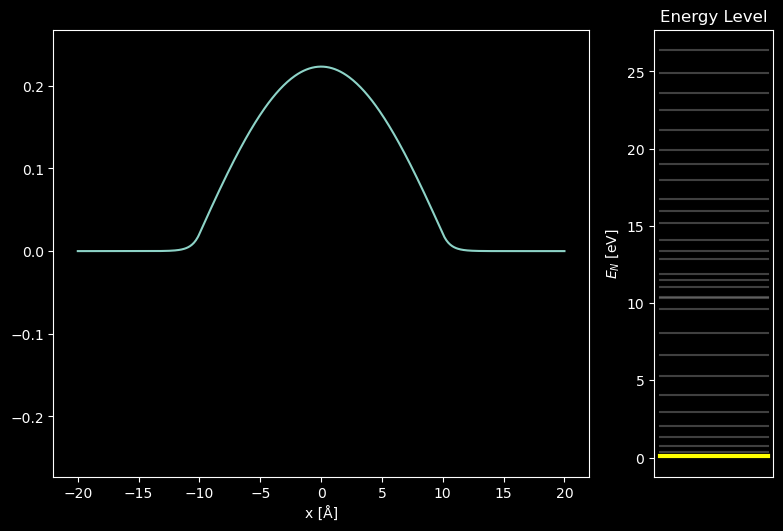

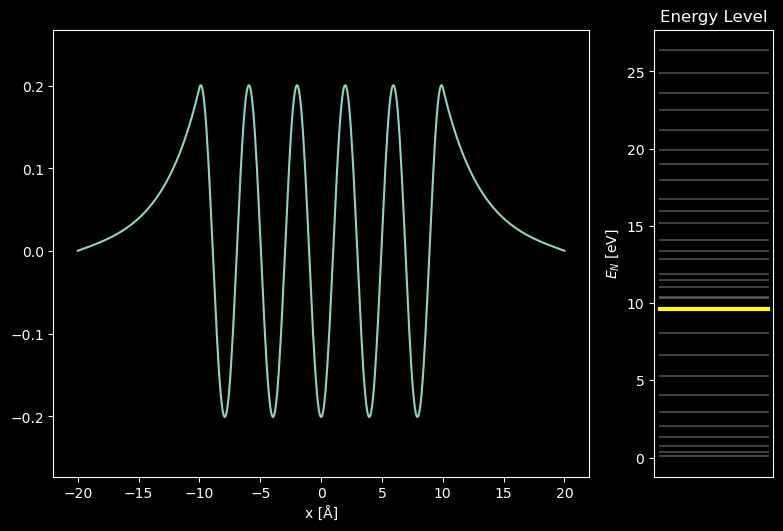

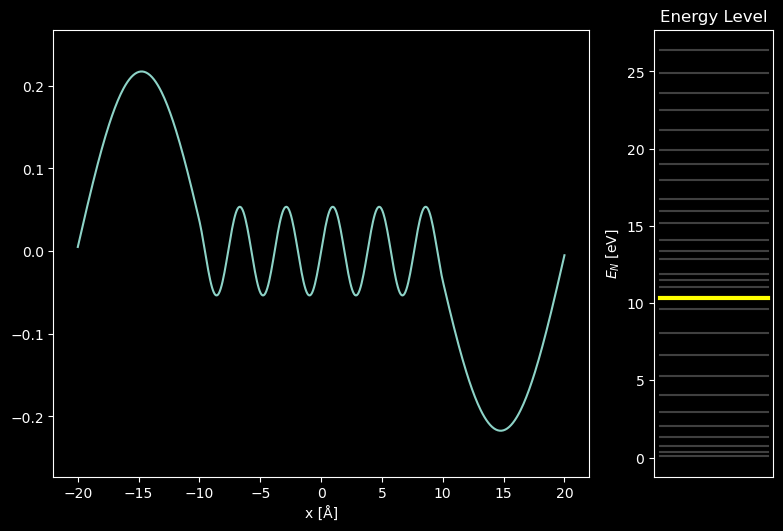

In [81]:
# 10 angstrom-wide infinite square well
def finite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 10*Å
    potential[out_of_bounds] = 10*eV
    return potential

# Define the Hamiltonian of the infinite square well
H_fsw = Hamiltonian(particles = SingleParticle(), potential = finite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 40*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_fsw = H_fsw.solve(max_states = 30)

print(eigenstates_fsw.energies)

# Visualize the infinite square well eigenstates
visualization_fsw = init_visualization(eigenstates_fsw)
visualization_fsw.plot_eigenstate(0)
visualization_fsw.plot_eigenstate(10)
visualization_fsw.plot_eigenstate(11)

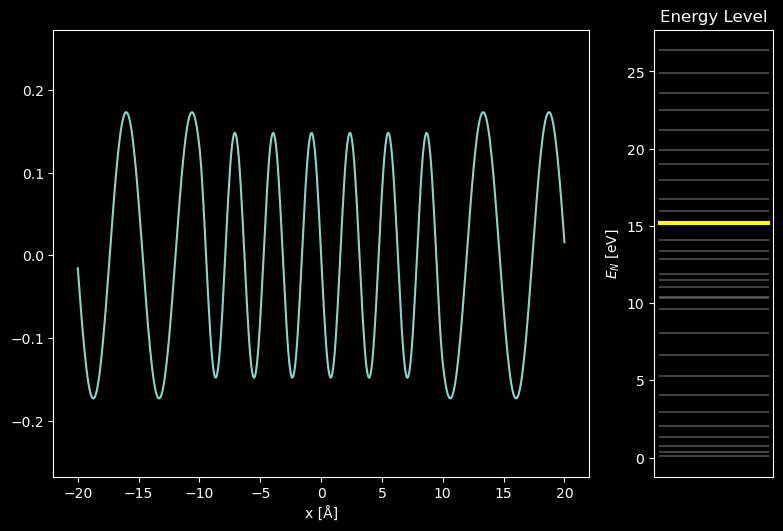

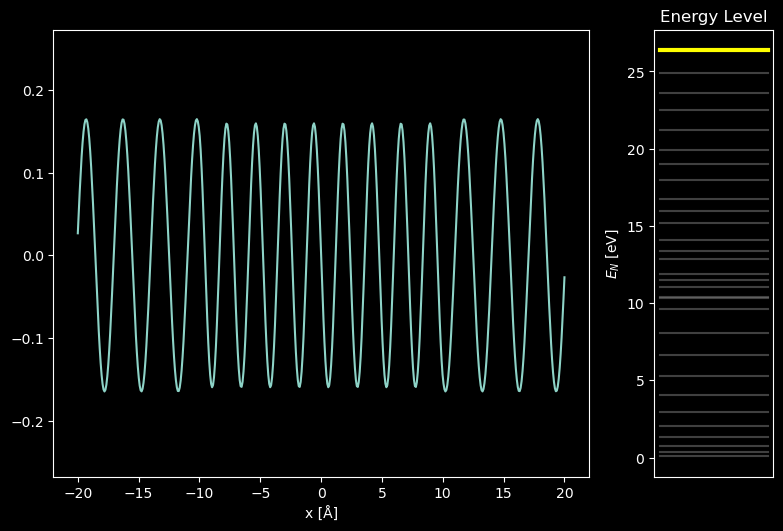

In [76]:
visualization_fsw.plot_eigenstate(19)
visualization_fsw.plot_eigenstate(29)

#### Answers
11. Based on my plots, a particle cannot get out of the finite square-well potential no matter the quantum number. To get out, the particle must have greater energy than $V_{o}=10eV$. For low quantum numbers, the system stays in the well but, in this case, for $n\ge12$, the particle escapes the well as shown by the continuing oscillations past the bounds at -10 and 10 angstrom.